In [85]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import vaex
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
from utils import compute_R_fast
from utils import compute_R

#events = pd.read_parquet("../fbd/data/clean/intraday/SPY.P_2010.parquet")
#events.set_index("index",inplace=True)

## we may need to collapse trades with exactly the same (bid,ask,trade price) together to reduce computational load and make things easier
## often these trade are a result of one big trade being chunked

# available one liner to aggregate trades
#! events =  events.groupby(["bid","ask","trade.price"])["trade.volume"].aggregate(["idxmin","sum"]).reset_index().rename(columns={"sum":"trade.volume"})


#events= compute_trade_sign(events)

df = vaex.open("../data/clean/DOW/DOW-events_w_s.arrow")
events = df.to_pandas_df()



In [99]:
events

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index,mid,s
0,27.993333,300.0,27.98,20.0,28.00,10.0,2010-01-04 14:30:03.362000128,27.990,1.0
1,28.006000,1100.0,27.98,16.0,28.03,5.0,2010-01-04 14:30:03.371999744,28.005,1.0
2,28.030000,400.0,27.98,16.0,28.03,3.0,2010-01-04 14:30:03.372999936,28.005,1.0
3,28.030000,300.0,28.02,4.0,28.05,1.0,2010-01-04 14:30:03.393999872,28.035,-1.0
4,28.050000,100.0,28.02,1.0,28.07,1.0,2010-01-04 14:30:03.403000064,28.045,1.0
...,...,...,...,...,...,...,...,...,...
1311469,34.150000,300.0,34.14,167.0,34.15,18.0,2010-12-31 20:59:57.248999680,34.145,1.0
1311470,34.150000,180.0,34.14,102.0,34.15,17.0,2010-12-31 20:59:57.257999872,34.145,1.0
1311471,34.150000,629.0,34.14,99.0,34.15,11.0,2010-12-31 20:59:57.320999936,34.145,1.0
1311472,34.150000,850.0,34.14,92.0,34.15,50.0,2010-12-31 20:59:58.225000192,34.145,1.0


In [100]:
arr = compute_R_fast(events, 10)

/home/lucastrg/FLEP/MA3/Financial_Big_Data/behavioural-trading/utils.py:64: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return np.array(response_function[:cutoff].values)


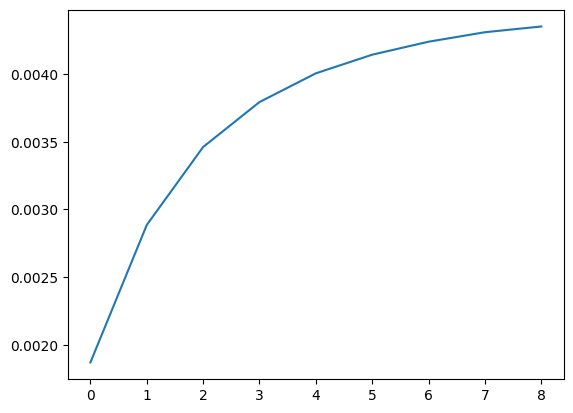

In [101]:
arr.shape
plt.plot(arr[1:])

In [102]:
events["unit_digit"]=events.trade_price.astype(int)%10

In [103]:
events["trade_sign"] = pd.Categorical(events["s"])

In [104]:
import seaborn as sns

In [105]:
events[events["s"]==0]

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index,mid,s,unit_digit,trade_sign


In [115]:
oui = events.groupby(["trade_sign","unit_digit"]).apply(lambda x : compute_R_fast(x,tau_max=1000))
df = pd.pivot_table(oui.apply(pd.Series),columns=oui.index)


/home/lucastrg/FLEP/MA3/Financial_Big_Data/behavioural-trading/utils.py:64: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return np.array(response_function[:cutoff].values)


In [116]:
df

,"(-1.0, 0)","(-1.0, 1)","(-1.0, 2)","(-1.0, 3)","(-1.0, 4)","(-1.0, 5)","(-1.0, 6)","(-1.0, 7)","(-1.0, 8)","(-1.0, 9)","(1.0, 0)","(1.0, 1)","(1.0, 2)","(1.0, 3)","(1.0, 4)","(1.0, 5)","(1.0, 6)","(1.0, 7)","(1.0, 8)","(1.0, 9)"
0,1.938690e-12,-2.555868e-12,-1.535558e-13,-5.097570e-13,-8.527833e-13,-1.224514e-12,6.654664e-13,6.009195e-13,-1.417268e-12,-7.877623e-13,7.090041e-13,-3.952921e-14,6.150818e-13,1.001846e-12,9.334207e-13,-1.205308e-12,1.356995e-12,-1.605950e-14,-4.275818e-13,-7.169684e-13
1,-1.126834e-05,-1.504614e-05,-5.563203e-05,-2.980340e-04,-1.633940e-04,-6.087292e-08,1.478378e-07,-3.308915e-07,-1.627781e-05,-1.329216e-05,1.221758e-05,1.551165e-05,5.447217e-05,3.544723e-04,1.631129e-04,6.328513e-08,1.347992e-12,-5.747986e-08,1.721702e-05,1.366310e-05
2,-2.247764e-05,-2.986244e-05,-1.118440e-04,-5.929578e-04,-3.267939e-04,-1.217461e-07,1.971188e-07,-8.823880e-07,-3.196270e-05,-2.651754e-05,2.431268e-05,3.086944e-05,1.062265e-04,7.087933e-04,3.262316e-04,1.265731e-07,4.840847e-07,4.598441e-07,3.443465e-05,2.718786e-05
3,-3.374651e-05,-4.337413e-05,-1.672020e-04,-8.899845e-04,-4.901996e-04,-1.826207e-07,1.478407e-07,-1.433897e-06,-4.764812e-05,-3.940761e-05,3.640807e-05,4.645922e-05,1.604380e-04,1.063139e-03,4.897995e-04,1.898626e-07,1.161813e-06,9.771800e-07,5.094653e-05,4.064364e-05
4,-4.501566e-05,-5.673269e-05,-2.225664e-04,-1.186135e-03,-6.536111e-04,-1.217491e-07,4.928116e-08,-1.544214e-06,-6.426670e-05,-5.229803e-05,4.850375e-05,6.204949e-05,2.146554e-04,1.416981e-03,6.534620e-04,2.531537e-07,1.839554e-06,1.034673e-06,6.728239e-05,5.430787e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-8.365921e-03,-2.475873e-04,-5.759850e-01,-3.072520e-01,-1.723874e-01,-8.182165e-04,8.515064e-05,3.585480e-03,-6.243231e-03,-2.694595e-03,9.376165e-03,6.367170e-04,5.189360e-01,3.669490e-01,1.724976e-01,1.034136e-03,-3.149225e-04,-3.347714e-03,7.317744e-03,4.938606e-03
996,-8.374784e-03,-2.418223e-04,-5.766182e-01,-3.075728e-01,-1.725645e-01,-8.176721e-04,8.530079e-05,3.589479e-03,-6.245322e-03,-2.689528e-03,9.384735e-03,6.321812e-04,5.195295e-01,3.673405e-01,1.726687e-01,1.033252e-03,-3.182494e-04,-3.350544e-03,7.323987e-03,4.936777e-03
997,-8.383527e-03,-2.359013e-04,-5.772524e-01,-3.078937e-01,-1.727416e-01,-8.173741e-04,8.545094e-05,3.593534e-03,-6.247240e-03,-2.684394e-03,9.393056e-03,6.277236e-04,5.201218e-01,3.677319e-01,1.728399e-01,1.032111e-03,-3.215763e-04,-3.353374e-03,7.329960e-03,4.934736e-03
998,-8.392630e-03,-2.302139e-04,-5.778864e-01,-3.082146e-01,-1.729187e-01,-8.171993e-04,8.560110e-05,3.597310e-03,-6.249332e-03,-2.679259e-03,9.401750e-03,6.232659e-04,5.207142e-01,3.681228e-01,1.730111e-01,1.031035e-03,-3.249032e-04,-3.356204e-03,7.335934e-03,4.932696e-03


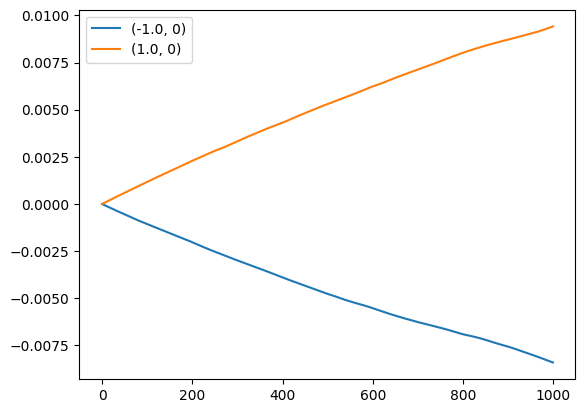

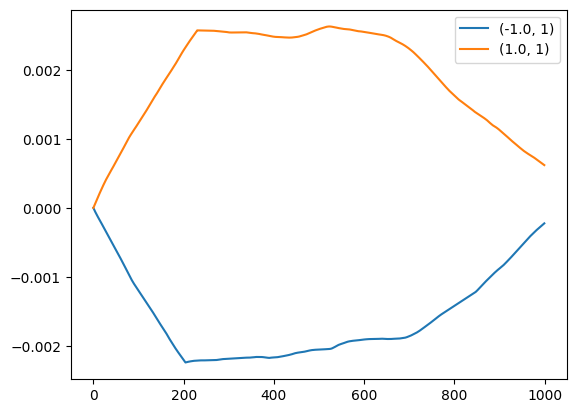

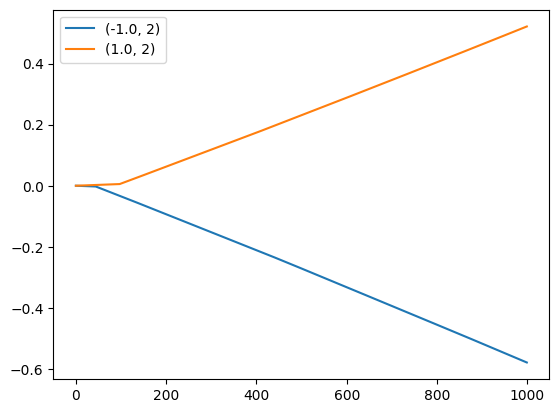

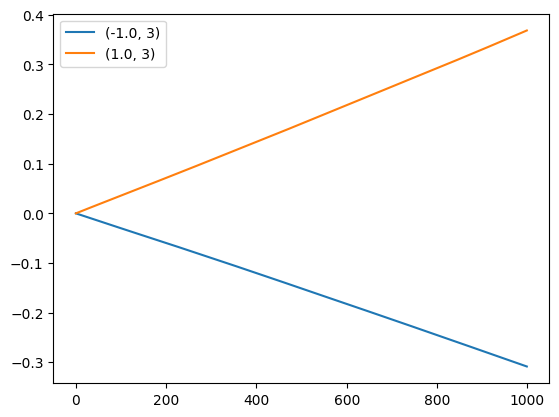

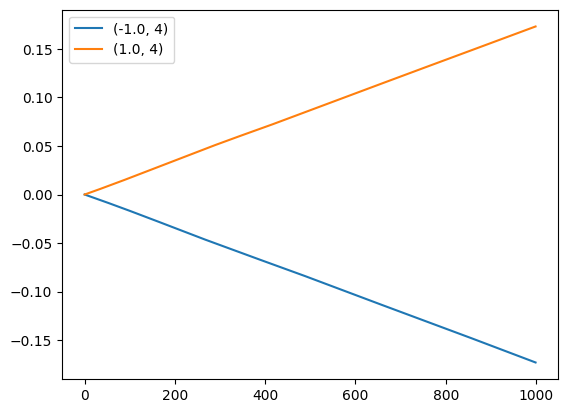

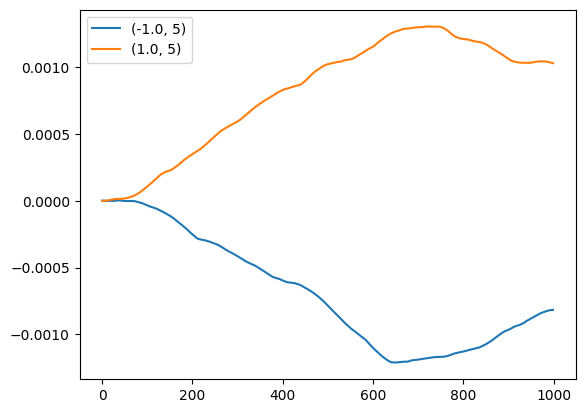

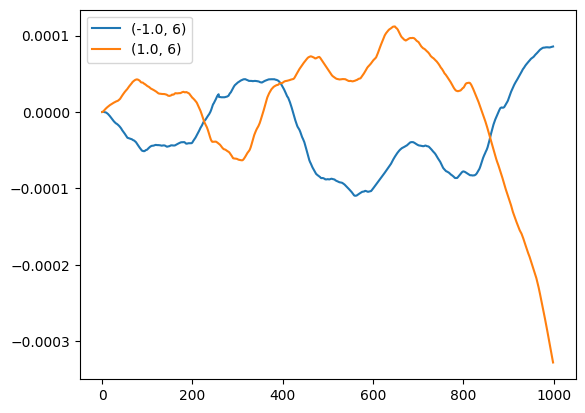

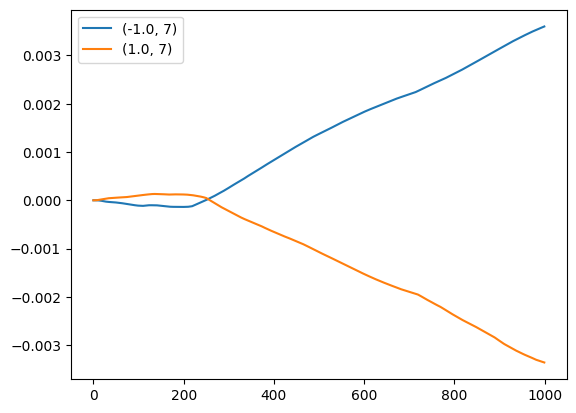

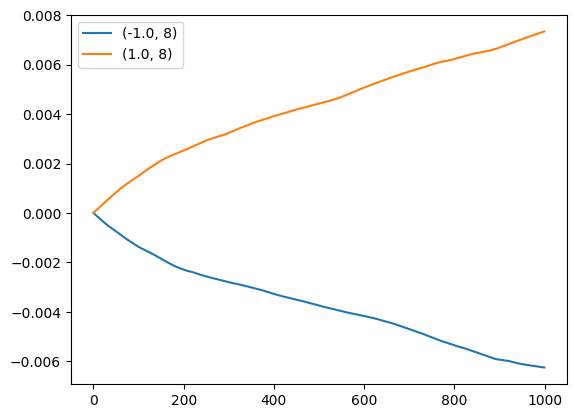

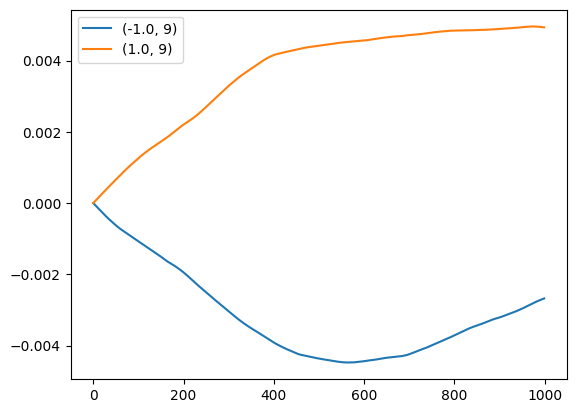

In [117]:
for i in range(10):
    df.iloc[:,0+i::10].plot()


TypeError: Setting a MultiIndex dtype to anything other than object is not supported

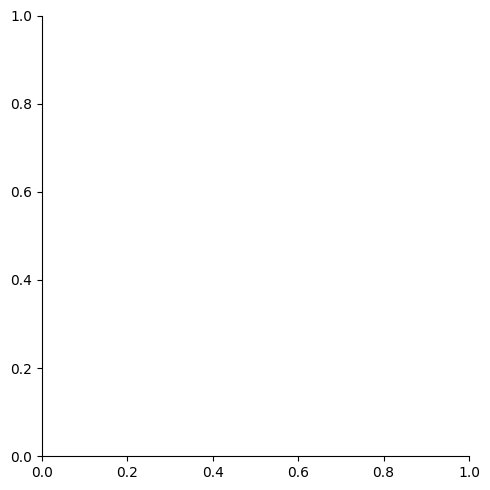

In [97]:
sns.catplot(df)

<AxesSubplot: >

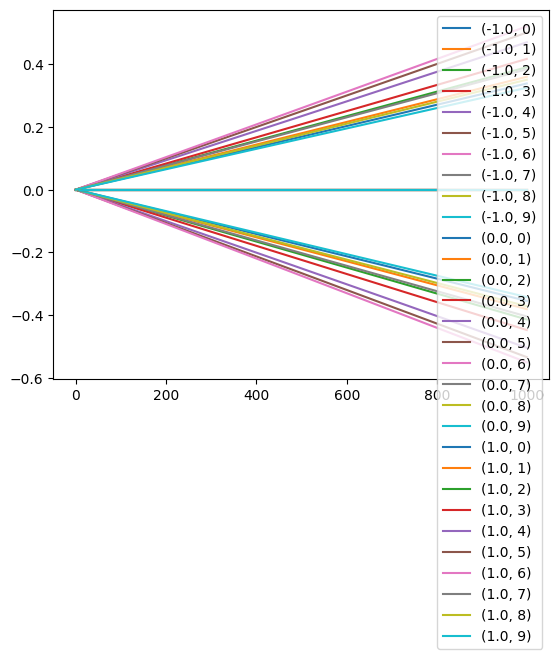

In [ ]:
df.plot()

In [ ]:
from utils import compute_R

date05=pd.Timestamp(2010,5,5)
date06=pd.Timestamp(2010,5,6)
date07=pd.Timestamp(2010,5,7)

events_05=events[events.index.date==date05.date()]
events_06=events[events.index.date==date06.date()]
events_07=events[events.index.date==date07.date()]

R_05=compute_R(events_05)
R_06=compute_R(events_06)
R_07=compute_R(events_07)

plt.plot(R_05,label="05")
plt.plot(R_06,label="06")
plt.plot(R_07,label="07")
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'date'

<AxesSubplot:>

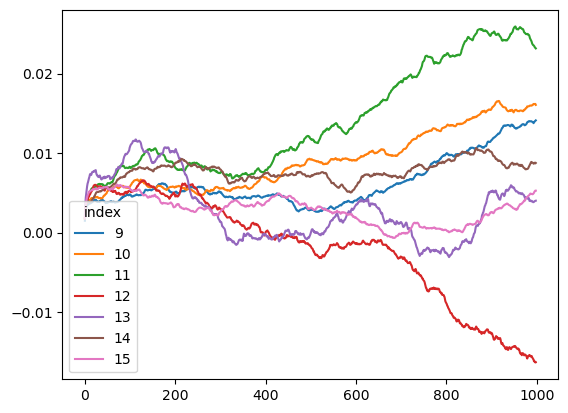

In [ ]:
R_05_hour=events_05[["s","mid"]].groupby(events_05.index.hour).apply(compute_R)
pd.pivot_table(R_05_hour.apply(pd.Series),columns=R_05_hour.index).plot()